In [1]:
 # Use numpy to convert to arrays
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  

In [2]:
dataset = pd.read_csv('/Users/xinyuewang/Downloads/normalized_by_2000_dtpts.csv')
dataset

,Unnamed: 0,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,...,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar,normalized_solar
0,0,13,0,13,50,204,77,4,10.0,82.67,...,3.814,355.2,96.35,11.0,1010.0,0.000080,9.756098e-07,9.756098e-07,6.611570e-07,0.000004
1,1,65,0,65,81,356,160,8,10.0,77.27,...,3.741,355.2,96.38,11.0,1010.0,0.184486,2.249829e-03,2.249829e-03,1.524678e-03,0.010323
2,2,10,0,10,99,487,248,7,10.0,72.18,...,3.669,1.7,96.05,11.0,1010.0,0.472936,5.767512e-03,5.767512e-03,3.908562e-03,0.026463
3,3,14,0,14,114,566,331,8,10.0,67.46,...,3.601,1.7,96.08,11.0,1010.0,0.919004,1.120737e-02,1.120737e-02,7.595074e-03,0.051423
4,4,31,0,31,119,643,409,4,10.0,63.22,...,3.534,5.4,89.10,12.0,1010.0,1.363654,1.662993e-02,1.662993e-02,1.126987e-02,0.076303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,51464,103,228,166,59,715,258,7,10.5,73.86,...,1.300,252.0,87.95,12.4,1012.0,278.939981,1.501292e-01,1.501292e-01,1.501292e-01,0.781612
51465,51465,65,111,86,49,596,162,7,10.5,79.03,...,1.300,237.0,90.88,11.9,1012.0,245.728932,1.322545e-01,1.322545e-01,1.322545e-01,0.688552
51466,51466,30,52,35,33,398,71,4,9.2,84.45,...,1.400,222.0,86.49,11.4,1013.0,151.002948,8.127177e-02,8.127177e-02,8.127177e-02,0.423122
51467,51467,5,27,5,10,85,10,7,9.2,89.79,...,1.400,222.0,86.49,11.4,1013.0,50.007981,2.691495e-02,2.691495e-02,2.691495e-02,0.140126


In [41]:
# Labels are the values we want to predict
labels = np.array(dataset['Normalized_Solar_lin'])
# Remove the labels from the features
# axis 1 refers to the columns
realtime_columns = ['DHI', 'DNI', 'GHI','Solar Zenith Angle', 'Surface Albedo','Temperature']
columns_all= ['DHI', 'DNI', 'GHI', 'Cloud Type', 'Dew Point', 
             'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed', 
             'Wind Direction', 'Relative Humidity', 'Temperature', 'Pressure']
RFcolumns=['Relative Humidity','Solar Zenith Angle','GHI','Surface Albedo','Wind Direction']
multilinearColumns=['Surface Albedo','Temperature','Relative Humidity','Solar Zenith Angle','Pressure']
features= dataset[realtime_columns]
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
features

array([[13.   ,  0.   , 13.   , 82.67 ,  0.143, 11.   ],
       [65.   ,  0.   , 65.   , 77.27 ,  0.143, 11.   ],
       [10.   ,  0.   , 10.   , 72.18 ,  0.143, 11.   ],
       ...,
       [30.   , 52.   , 35.   , 84.45 ,  0.14 , 11.4  ],
       [ 5.   , 27.   ,  5.   , 89.79 ,  0.14 , 11.4  ],
       [ 0.   ,  0.   ,  0.   , 96.19 ,  0.14 ,  7.1  ]])

In [36]:
print('The shape of our features is:', features.shape)

The shape of our features is: (51469, 6)


In [37]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [38]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (38601, 6)
Training Labels Shape: (38601,)
Testing Features Shape: (12868, 6)
Testing Labels Shape: (12868,)


In [39]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'watt.')
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions)) 
print('Mean squared Error::', metrics.mean_squared_error(test_labels, predictions)) 
print('R Squared Error:', r2_score(test_labels, predictions))

Mean Absolute Error: 0.14 watt.
Mean Absolute Error: 0.13907182942797028
Mean squared Error:: 0.03486460248338864
R Squared Error: 0.6432653799068886


In [ ]:
 predictions

In [ ]:
 test_labels

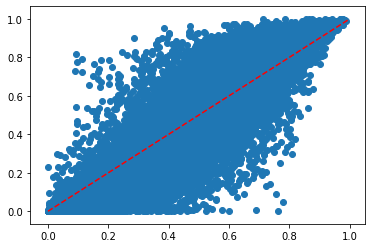

In [10]:
plt.scatter(predictions,test_labels)
plt.plot([0,1],[0,1], 'r--')

In [11]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -495809.29 %.


when choose all the 12 feature columns R2 = 0.78

when choose top 5 feature from RF feature selection.
Mean Absolute Error: 0.12 watt.
Mean Absolute Error: 0.12456254980498581
R Squared Error: 0.7111779101313127

when choose top 5 feature from linear regression selection.
Mean Absolute Error: 0.12 watt.
Mean Absolute Error: 0.12005829970846314
R Squared Error: 0.7256975802742123

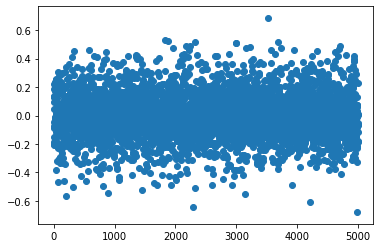

In [16]:
residual = predictions - test_labels
i = 5000
plt.scatter(range(i), residual[:i])

In [50]:
dataset[columns_all]

,DHI,DNI,GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Wind Direction,Relative Humidity,Temperature,Pressure
0,13,0,13,4,10.0,82.67,0.143,2.9,355.2,96.35,11.0,1010.0
1,65,0,65,8,10.0,77.27,0.143,3.0,355.2,96.38,11.0,1010.0
2,10,0,10,7,10.0,72.18,0.143,3.3,1.7,96.05,11.0,1010.0
3,14,0,14,8,10.0,67.46,0.143,3.3,1.7,96.08,11.0,1010.0
4,31,0,31,4,10.0,63.22,0.143,3.4,5.4,89.10,12.0,1010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51464,103,228,166,7,10.5,73.86,0.140,0.7,252.0,87.95,12.4,1012.0
51465,65,111,86,7,10.5,79.03,0.140,0.7,237.0,90.88,11.9,1012.0
51466,30,52,35,4,9.2,84.45,0.140,0.8,222.0,86.49,11.4,1013.0
51467,5,27,5,7,9.2,89.79,0.140,0.8,222.0,86.49,11.4,1013.0


In [57]:
from sklearn.model_selection import KFold
def kfold_CV(X_columns_all):
    y=labels
    kf = KFold(n_splits=10, shuffle=True)# Define the split - into 10 folds 
    kf.get_n_splits(X_columns_all, y)# returns the number of splitting iterations in the cross-validator
    print(kf) 
    fig, ax = plt.subplots(figsize=(8,6))

    mse = np.zeros((12, 10))
    j = 0
    #creat train and test vars 
    for train_index, test_index in kf.split(X_columns_all, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        #print("x-train[X_train.columns[0:2]]: ", X_train[X_train.columns[0:2].values])
        #print (X_train.shape, y_train.shape)
        #print (X_test.shape, y_test.shape)
        X_train, X_test = dataset[columns_all].iloc[train_index], dataset[columns_all].iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        for i in range(1, 13):
            rf = RandomForestRegressor(n_estimators = 100, random_state = 42)#change estimator
            # Train the model on training data
            reg = rf.fit(X_train[X_train.columns[0:i].values], y_train)#use first i features train 
            y_pred = rf.predict(X_test[X_test.columns[0:i].values])

            mse[i-1, j] = metrics.mean_squared_error(y_test, y_pred)


        ax.plot(np.linspace(1, 11, 12), mse[:, j], linewidth=4, color='b', alpha=0.09)
        ax.set_ylabel('Mean Squared Error')
        ax.set_xlabel('Degree of Polynomial')
        j += 1

    avg_mse = mse.mean(axis=1)
    ax.plot(np.linspace(1, 11, 12), avg_mse, color='purple')

KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   46    88   107 ... 51433 51451 51459]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   15    20    24 ... 51448 51456 51457]
TRAIN: [    1     2     3 ... 51466 51467 51468] TEST: [    0     4     7 ... 51450 51463 51464]
TRAIN: [    0     1     2 ... 51463 51464 51466] TEST: [   12    28    40 ... 51465 51467 51468]
TRAIN: [    0     1     2 ... 51465 51467 51468] TEST: [    3     5     6 ... 51441 51454 51466]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   14    44    45 ... 51439 51449 51453]
TRAIN: [    0     2     3 ... 51466 51467 51468] TEST: [    1    26    54 ... 51384 51423 51435]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    8    13    29 ... 51434 51461 51462]
TRAIN: [    0     1     3 ... 51466 51467 51468] TEST: [    2    11    18 ... 51455 51458 51460]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   16    19    33 .

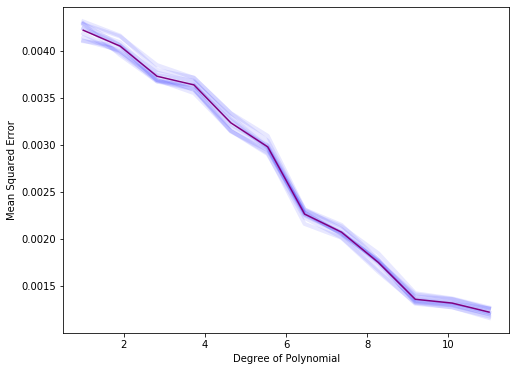

In [58]:
kfold_CV(dataset[columns_all])